In [1]:
#Used for creating the train and validation data
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np
import pandas as pd

#Data Visualization:
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'

df = pd.read_csv(url)

Normalization/standardization. Specifiying the test and training data.

In [2]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

df[varlist] = df[varlist].apply(binary_map)
df = df.drop('furnishingstatus', axis=1)

np.random.seed(0)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [3]:
normalize = MinMaxScaler()
norm_train = normalize.fit_transform(df_train)
norm_val = normalize.fit_transform(df_val)

# Convert Normalized Training and Validation set back to dataframe for train model algorithm
norm_train = pd.DataFrame(norm_train, columns=df_train.columns)
norm_val  = pd.DataFrame(norm_val, columns=df_val.columns)

In [4]:
standardize = StandardScaler()
std_train = standardize.fit_transform(df_train)
std_val  = standardize.fit_transform(df_val)

# Convert Standardized Training and Validation set back to dataframe for training model algorithm
std_train = pd.DataFrame(std_train, columns=df_train.columns)
std_val  = pd.DataFrame(std_val , columns=df_val.columns)

Output data. Does not need to be normalized?

In [5]:
y_train = df_train.pop('price')
y_val = df_val.pop('price')

#Normalized Training and Validation set
y_train_norm = norm_train.pop('price')
y_val_norm = norm_val.pop('price')

#Normalized Training and Validation set
y_train_std = std_train.pop('price')
y_val_std = std_val.pop('price')

Training and Validation Function model using gradient descent.

In [6]:
def train_model(inputs, df_train, df_val, y_train, y_val, learning_rate, iterations):
    #Split the data into training and validation sets
    x_train = df_train[inputs]
    x_train = np.c_[np.ones((len(x_train), 1)), x_train]

    x_val = df_val[inputs]
    x_val = np.c_[np.ones((len(x_val), 1)), x_val]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_val)
    theta = np.zeros(n)

    train_losses = []
    val_losses = []

    for i in range(iterations):

        h_theta = x_train.dot(theta)
        error = np.subtract(h_theta, y_train)

        gradient = (1 / m_train) * (x_train.transpose().dot(error))
        theta -= (learning_rate * gradient)

        train_loss = 1 / (2 * m_train) * np.sum(np.square((h_theta - y_train)))
        val_loss = 1 / (2 * m_valid) * np.sum(np.square((x_val.dot(theta) - y_val)))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

Problem 2.a

In [7]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

learning_rate1 = 0.1
learning_rate2 = 0.05
learning_rate3 = 0.01

iterations = 250

# Training with normalized inputs at different learning rates
norm_train_losses1, norm_val_losses1 = train_model(inputs, norm_train, norm_val, y_train, y_val, learning_rate1, iterations)
norm_train_losses2, norm_val_losses2 = train_model(inputs, norm_train, norm_val, y_train, y_val, learning_rate2, iterations)
norm_train_losses3, norm_val_losses3 = train_model(inputs, norm_train, norm_val, y_train, y_val, learning_rate3, iterations)

# Training with standardized inputs at different learning rates
std_train_losses1, std_val_losses1 = train_model(inputs, std_train, std_val, y_train, y_val, learning_rate1, iterations)
std_train_losses2, std_val_losses2 = train_model(inputs, std_train, std_val, y_train, y_val, learning_rate2, iterations)
std_train_losses3, std_val_losses3 = train_model(inputs, std_train, std_val, y_train, y_val, learning_rate3, iterations)


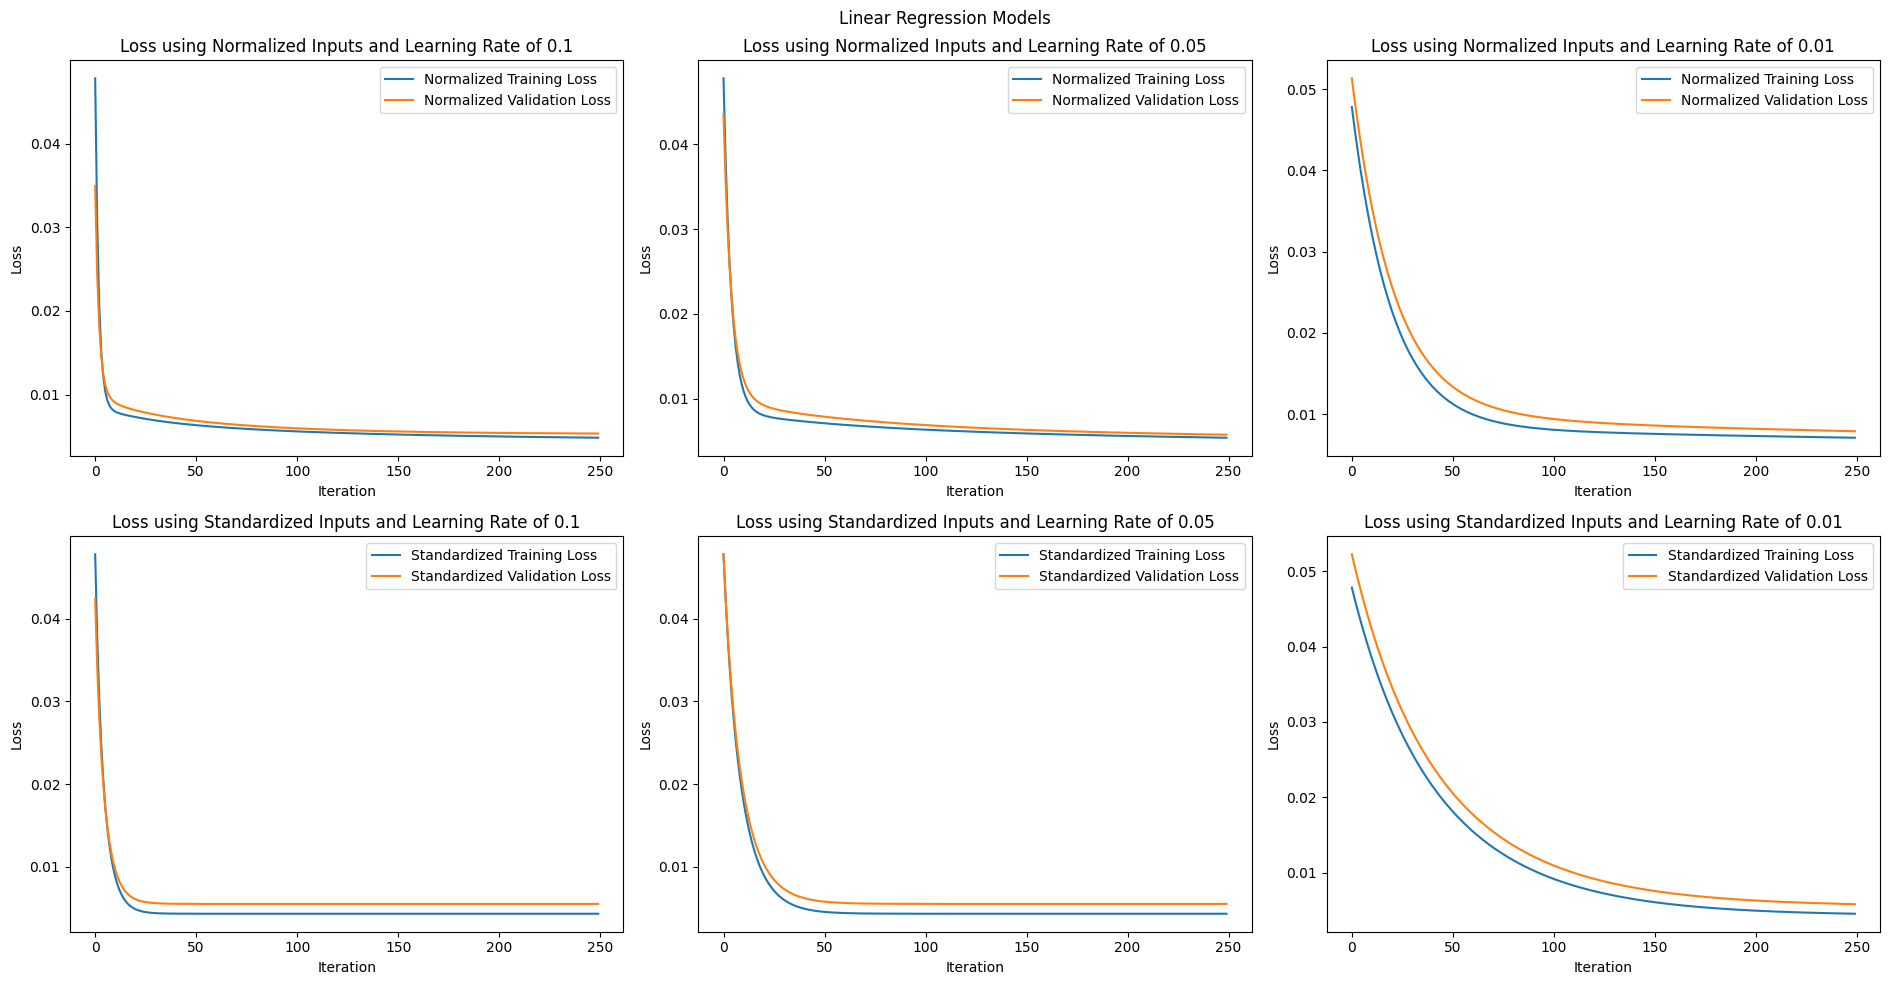

In [15]:
# Plot the losses
plt.figure(figsize=(19, 10))
plt.suptitle('Linear Regression Models')

plt.subplot(2, 3, 1)
plt.plot(norm_train_losses1, label="Normalized Training Loss")
plt.plot(norm_val_losses1, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Inputs and Learning Rate of {learning_rate1}")

plt.subplot(2, 3, 4)
plt.plot(std_train_losses1, label="Standardized Training Loss")
plt.plot(std_val_losses1, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Standardized Inputs and Learning Rate of {learning_rate1}")

plt.subplot(2, 3, 2)
plt.plot(norm_train_losses2, label="Normalized Training Loss")
plt.plot(norm_val_losses2, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Inputs and Learning Rate of {learning_rate2}")

plt.subplot(2, 3, 5)
plt.plot(std_train_losses2, label="Standardized Training Loss")
plt.plot(std_val_losses2, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Standardized Inputs and Learning Rate of {learning_rate2}")

plt.subplot(2, 3, 3)
plt.plot(norm_train_losses3, label="Normalized Training Loss")
plt.plot(norm_val_losses3, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Inputs and Learning Rate of {learning_rate3}")

plt.subplot(2, 3, 6)
plt.plot(std_train_losses3, label="Standardized Training Loss")
plt.plot(std_val_losses3, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Standardized Inputs and Learning Rate of {learning_rate3}")

plt.tight_layout()
plt.show()

Problem 2.b

In [9]:
# Include all inputs except for furnishingstatus
inputs = norm_train.columns.tolist()

# Training with normalized inputs and unscaled outputs
unscaledNorm_train_losses1, unscaledNorm_val_losses1 = train_model(inputs, norm_train, norm_val, y_train, y_val, learning_rate1, iterations)
unscaledNorm_train_losses2, unscaledNorm_val_losses2 = train_model(inputs, norm_train, norm_val, y_train, y_val, learning_rate2, iterations)
unscaledNorm_train_losses3, unscaledNorm_val_losses3 = train_model(inputs, norm_train, norm_val, y_train, y_val, learning_rate3, iterations)

# Training with standardized inputs and unscaled outputs
unscaledStd_train_losses1, unscaledStd_val_losses1 = train_model(inputs, std_train, std_val, y_train, y_val, learning_rate1, iterations)
unscaledStd_train_losses2, unscaledStd_val_losses2 = train_model(inputs, std_train, std_val, y_train, y_val, learning_rate2, iterations)
unscaledStd_train_losses3, unscaledStd_val_losses3 = train_model(inputs, std_train, std_val, y_train, y_val, learning_rate3, iterations)

# Training with normalized inputs and outputs
norm_train_losses1, norm_val_losses1 = train_model(inputs, norm_train, norm_val, y_train_norm, y_val_norm, learning_rate1, iterations)
norm_train_losses2, norm_val_losses2 = train_model(inputs, norm_train, norm_val, y_train_norm, y_val_norm, learning_rate2, iterations)
norm_train_losses3, norm_val_losses3 = train_model(inputs, norm_train, norm_val, y_train_norm, y_val_norm, learning_rate3, iterations)

# Training with standardized inputs and normalized outputs
std_train_losses1, std_val_losses1 = train_model(inputs, std_train, std_val, y_train_norm, y_val_norm, learning_rate1, iterations)
std_train_losses2, std_val_losses2 = train_model(inputs, std_train, std_val, y_train_norm, y_val_norm, learning_rate2, iterations)
std_train_losses3, std_val_losses3 = train_model(inputs, std_train, std_val, y_train_norm, y_val_norm, learning_rate3, iterations)

Normalized Linear Regression Plots

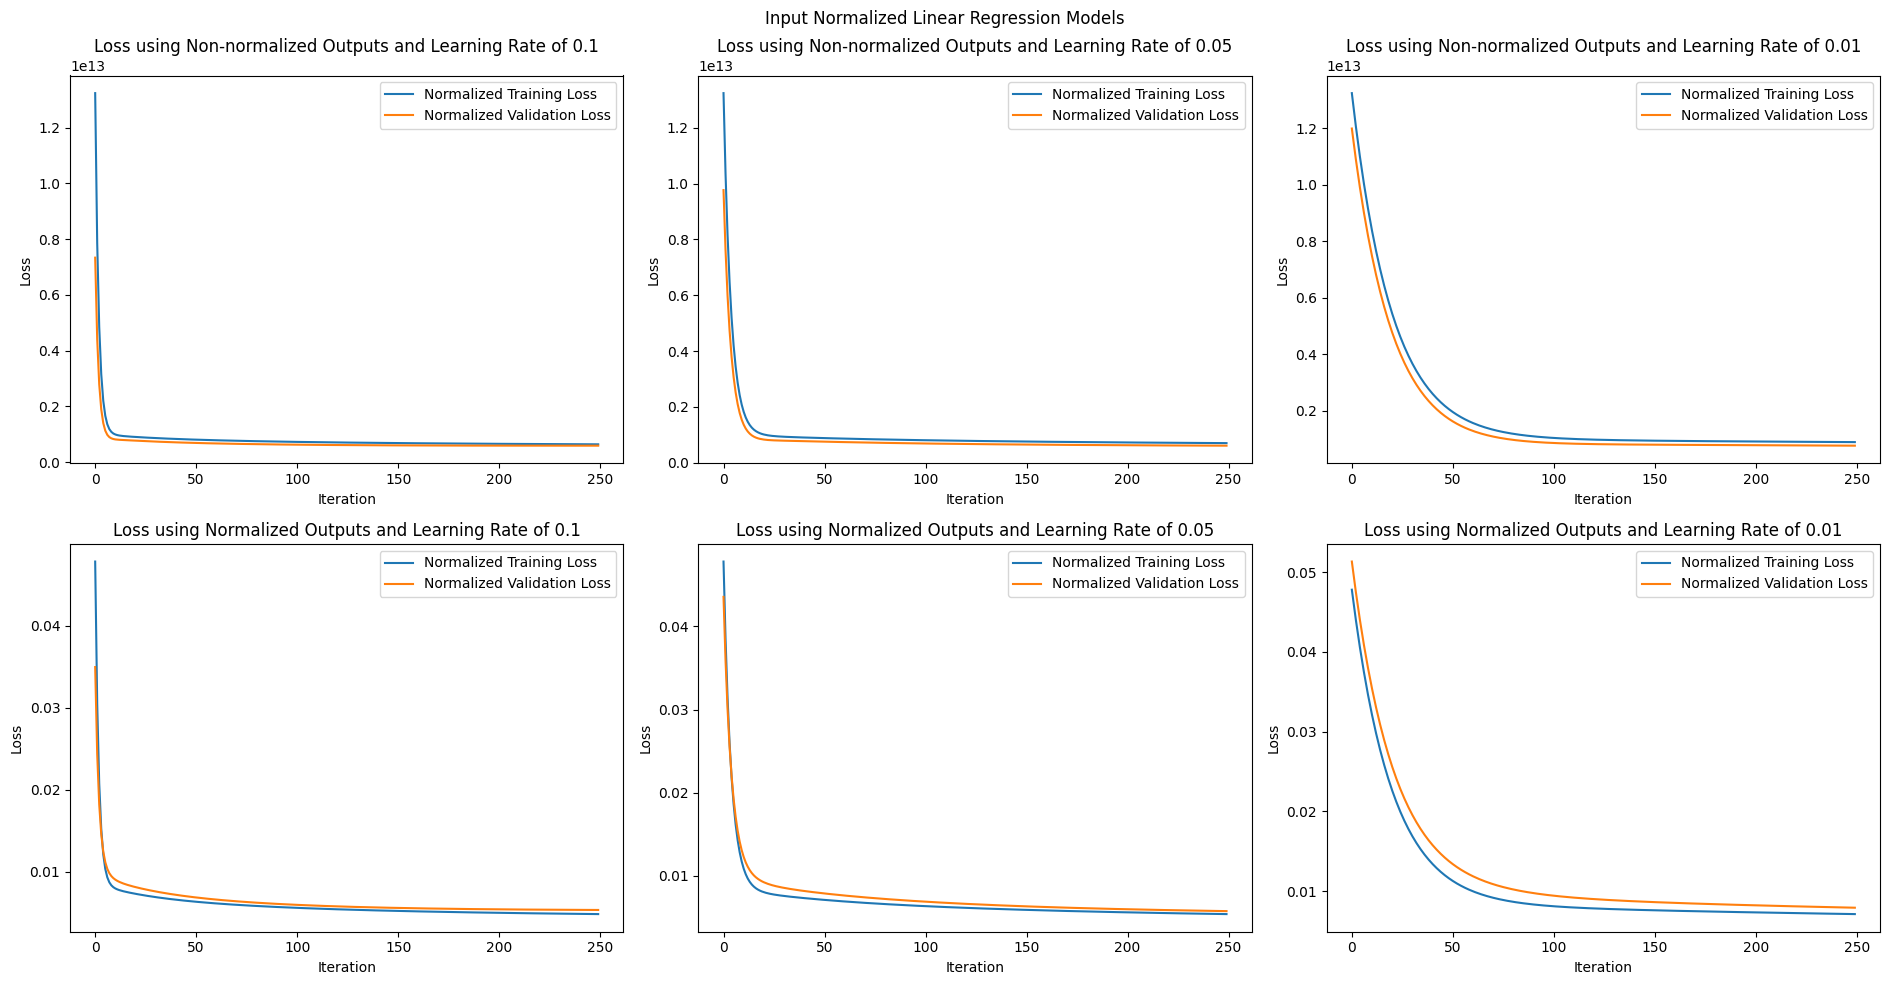

In [16]:
# Plot the losses
plt.figure(figsize=(19, 10))
plt.suptitle('Input Normalized Linear Regression Models')

plt.subplot(2, 3, 1)
plt.plot(unscaledNorm_train_losses1, label="Normalized Training Loss")
plt.plot(unscaledNorm_val_losses1, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {learning_rate1}")

plt.subplot(2, 3, 4)
plt.plot(norm_train_losses1, label="Normalized Training Loss")
plt.plot(norm_val_losses1, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Outputs and Learning Rate of {learning_rate1}")

plt.subplot(2, 3, 2)
plt.plot(unscaledNorm_train_losses2, label="Normalized Training Loss")
plt.plot(unscaledNorm_val_losses2, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {learning_rate2}")

plt.subplot(2, 3, 5)
plt.plot(norm_train_losses2, label="Normalized Training Loss")
plt.plot(norm_val_losses2, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Outputs and Learning Rate of {learning_rate2}")

plt.subplot(2, 3, 3)
plt.plot(unscaledNorm_train_losses3, label="Normalized Training Loss")
plt.plot(unscaledNorm_val_losses3, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {learning_rate3}")

plt.subplot(2, 3, 6)
plt.plot(norm_train_losses3, label="Normalized Training Loss")
plt.plot(norm_val_losses3, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Outputs and Learning Rate of {learning_rate3}")

plt.tight_layout()
plt.show()

Standardized Linear Regression Plots

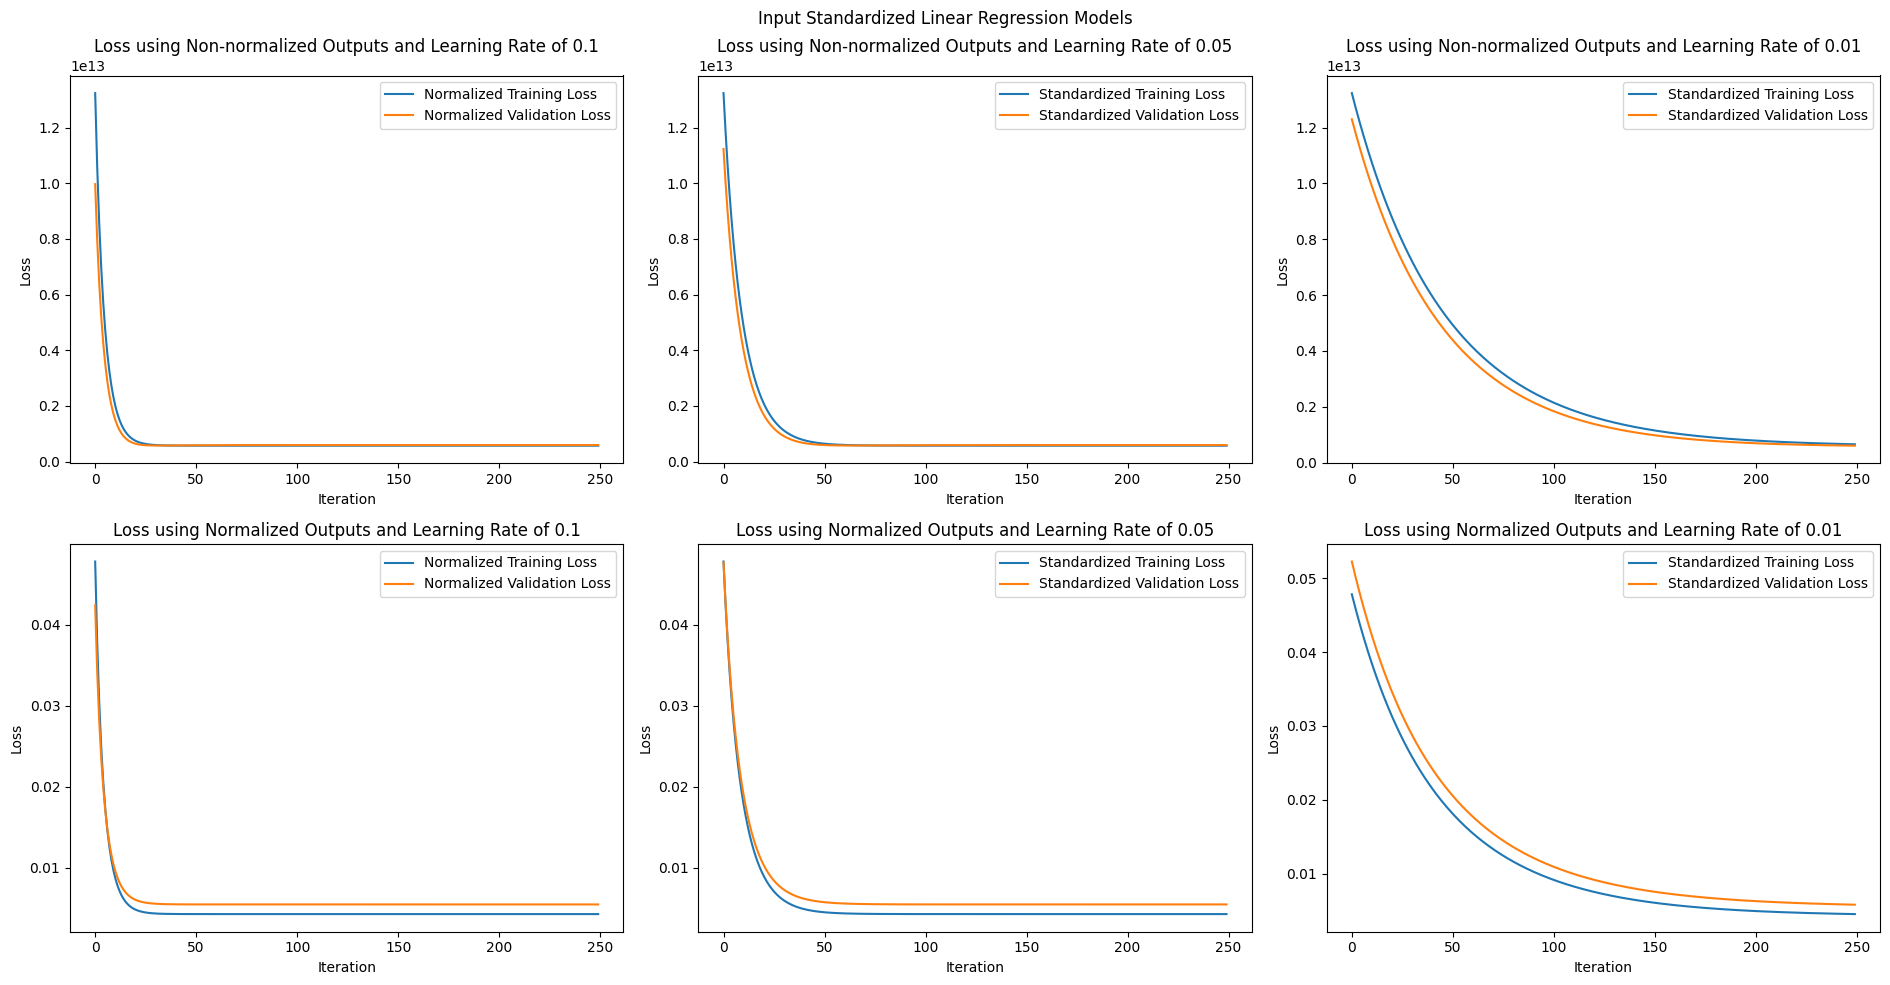

In [17]:
# Plot the losses
plt.figure(figsize=(19, 10))
plt.suptitle('Input Standardized Linear Regression Models')

plt.subplot(2, 3, 1)
plt.plot(unscaledStd_train_losses1, label="Normalized Training Loss")
plt.plot(unscaledStd_val_losses1, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {learning_rate1}")

plt.subplot(2, 3, 4)
plt.plot(std_train_losses1, label="Normalized Training Loss")
plt.plot(std_val_losses1, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Outputs and Learning Rate of {learning_rate1}")

plt.subplot(2, 3, 2)
plt.plot(unscaledStd_train_losses2, label="Standardized Training Loss")
plt.plot(unscaledStd_val_losses2, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {learning_rate2}")

plt.subplot(2, 3, 5)
plt.plot(std_train_losses2, label="Standardized Training Loss")
plt.plot(std_val_losses2, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Outputs and Learning Rate of {learning_rate2}")

plt.subplot(2, 3, 3)
plt.plot(unscaledStd_train_losses3, label="Standardized Training Loss")
plt.plot(unscaledStd_val_losses3, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {learning_rate3}")

plt.subplot(2, 3, 6)
plt.plot(std_train_losses3, label="Standardized Training Loss")
plt.plot(std_val_losses3, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title(f"Loss using Normalized Outputs and Learning Rate of {learning_rate3}")

plt.tight_layout()
plt.show()